In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("SHR1976_2015.csv", dtype={"VicAge": object, "OffAge": object}, na_values=['999','Unknown','0'])

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA,StateName2
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,ALASKA,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,Unknown or not reported,55,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,NaN,NaN,30180,Alaska,Rural Alaska,ALASKA
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,ALA,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,NaN,NaN,30180,Alabama,"Birmingham-Hoover, AL",ALA
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,ALA,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,NaN,NaN,30180,Alabama,"Birmingham-Hoover, AL",ALA
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,ALA,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,NaN,NaN,30180,Alabama,"Birmingham-Hoover, AL",ALA
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,ALA,January,1.0,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,NaN,NaN,30180,Alabama,"Mobile, AL",ALA


In [5]:
df.shape

(732171, 33)

In [6]:
df.dtypes

ID               object
CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
StateName        object
Month            object
Incident        float64
ActionType       object
Homicide         object
Situation        object
VicAge           object
VicSex           object
VicRace          object
VicEthnic        object
OffAge           object
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount        float64
OffCount        float64
FileDate          int64
fstate           object
MSA              object
StateName2       object
dtype: object

In [7]:
df['Weapon'].unique()

array(['Knife or cutting instrument', 'Shotgun', 'Strangulation - hanging',
       'Rifle', 'Handgun - pistol, revolver, etc',
       'Personal weapons, includes beating', 'Fire',
       'Other or type unknown', 'Firearm, type not stated',
       'Asphyxiation - includes death by gas',
       'Narcotics or drugs, sleeping pills',
       'Blunt object - hammer, club, etc', 'Drowning',
       'Pushed or thrown out window', 'Other gun',
       'Poison - does not include gas', 'Explosives'], dtype=object)

In [8]:
df = df[df['Homicide'] == 'Murder and non-negligent manslaughter']

In [9]:
df.shape

(721898, 33)

In [10]:
df = df.replace('Unknown', np.nan)

In [11]:
df.shape

(721898, 33)

In [12]:
df.drop(['CNTYFIPS', 'Ori','Agency', 'Agentype', 'StateName', 'VicEthnic', 'OffEthnic','Subcircum', 'FileDate', 'fstate','MSA', 'StateName2','VicCount','OffCount'],axis=1,inplace=True)

In [13]:
#df.drop('CNTYFIPS', axis=1, inplace=True)

In [14]:
df.shape

(721898, 19)

In [15]:
df.head(2)

,ID,State,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance
0,197601001AKASP00,Alaska,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,55,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments
1,197601001AL00102,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,Black,67,Male,Black,Shotgun,Acquaintance,Felon killed by private citizen


In [16]:
#most used weapons
df.groupby('State')['Weapon'].value_counts()

State      Weapon                              
Alabama    Handgun - pistol, revolver, etc         7305
           Knife or cutting instrument             1904
           Shotgun                                 1365
           Other or type unknown                   1054
           Personal weapons, includes beating       607
           Rifle                                    512
           Blunt object - hammer, club, etc         294
           Firearm, type not stated                 138
           Strangulation - hanging                   47
           Fire                                      35
           Drowning                                  15
           Asphyxiation - includes death by gas      12
           Explosives                                 5
           Poison - does not include gas              5
           Other gun                                  3
           Narcotics or drugs, sleeping pills         1
           Pushed or thrown out window                1


In [17]:
df.groupby('State')['Weapon'].value_counts().sort_values(ascending = False)

State           Weapon                            
California      Handgun - pistol, revolver, etc       60221
Texas           Handgun - pistol, revolver, etc       34090
New York        Handgun - pistol, revolver, etc       30203
Illinois        Handgun - pistol, revolver, etc       18458
California      Knife or cutting instrument           17591
Florida         Handgun - pistol, revolver, etc       15708
Pennsylvania    Handgun - pistol, revolver, etc       14946
Louisiana       Handgun - pistol, revolver, etc       13564
Michigan        Handgun - pistol, revolver, etc       13549
Georgia         Handgun - pistol, revolver, etc       13442
Maryland        Handgun - pistol, revolver, etc       11783
New York        Knife or cutting instrument           11287
Texas           Knife or cutting instrument           11121
Ohio            Handgun - pistol, revolver, etc       10896
North Carolina  Handgun - pistol, revolver, etc       10301
Tennessee       Handgun - pistol, revolver, etc  

In [18]:
#making a new dataframe only for guns
weapons = pd.crosstab(df.State, df.Weapon)

In [19]:
weapons_new = weapons[['Firearm, type not stated', 'Handgun - pistol, revolver, etc',
                       'Rifle', 'Shotgun', 'Other gun']]

In [20]:
weapons_new.dtypes

Weapon
Firearm, type not stated           int64
Handgun - pistol, revolver, etc    int64
Rifle                              int64
Shotgun                            int64
Other gun                          int64
dtype: object

In [21]:
weapons_new.head()

Weapon,"Firearm, type not stated","Handgun - pistol, revolver, etc",Rifle,Shotgun,Other gun
State,,,,,
Alabama,138,7305,512,1365,3
Alaska,148,627,191,98,5
Arizona,691,7436,646,540,38
Arkansas,651,3559,525,694,33
California,5421,60221,4705,5071,38


In [22]:
#df.to_csv("cleaned.csv", encoding = 'utf-8', index = False)

In [23]:
#df_cleaned= pd.read_csv("cleaned-csv.csv")

In [24]:
sum_weapons = df

In [25]:
sum_weapons.loc[(sum_weapons['Weapon'] == 'Shotgun') | (sum_weapons['Weapon'] == 'Rifle') 
                | (sum_weapons['Weapon'] == 'Handgun - pistol, revolver, etc')
                | (sum_weapons['Weapon'] == 'Firearm, type not stated') 
                | (sum_weapons['Weapon'] == 'Other gun'),
               'Gun'] = 'Gun'

In [26]:
sum_weapons.head()

,ID,State,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,Gun
0,197601001AKASP00,Alaska,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,55,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments,NaN
1,197601001AL00102,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,Black,67,Male,Black,Shotgun,Acquaintance,Felon killed by private citizen,Gun
2,197601001AL00104,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45,Female,Black,53,Male,Black,Shotgun,Wife,Other,Gun
3,197601001AL00106,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43,Male,Black,35,Female,Black,Knife or cutting instrument,Brother,Other arguments,NaN
4,197601001AL00201,Alabama,FBI,Yes,1976,January,1.0,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35,Male,White,25,Female,White,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN


In [27]:
sum_weapons['Gun'].value_counts()

Gun    475827
Name: Gun, dtype: int64

In [28]:
count_guns = sum_weapons.groupby("State")["Gun"].count().reset_index(name="count")

In [29]:
sum_weapons

,ID,State,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,Gun
0,197601001AKASP00,Alaska,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,55,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments,NaN
1,197601001AL00102,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,Black,67,Male,Black,Shotgun,Acquaintance,Felon killed by private citizen,Gun
2,197601001AL00104,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45,Female,Black,53,Male,Black,Shotgun,Wife,Other,Gun
3,197601001AL00106,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43,Male,Black,35,Female,Black,Knife or cutting instrument,Brother,Other arguments,NaN
4,197601001AL00201,Alabama,FBI,Yes,1976,January,1.0,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35,Male,White,25,Female,White,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN
5,197601001AL00202,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,25,Male,Black,26,Male,Black,Rifle,Friend,Other arguments,Gun
6,197601001AL00300,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27,Female,Black,29,Male,Black,"Handgun - pistol, revolver, etc",Wife,Other arguments,Gun
7,197601001AL00301,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,42,Female,Black,19,Male,Black,Knife or cutting instrument,Relationship not determined,Circumstances undetermined,NaN
8,197601001AL00500,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,30,Female,White,Shotgun,Husband,Other arguments,Gun
9,197601001AL01101,Alabama,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,50,Male,White,42,Male,White,"Handgun - pistol, revolver, etc",Brother,Other arguments,Gun


In [30]:
sum_weapons.groupby('State')['Gun'].value_counts()

State                 Gun
Alabama               Gun     9323
Alaska                Gun     1069
Arizona               Gun     9351
Arkansas              Gun     5462
California            Gun    75456
Colorado              Gun     4156
Connecticut           Gun     3331
Delaware              Gun      817
District of Columbia  Gun     5941
Florida               Gun    25586
Georgia               Gun    16529
Hawaii                Gun      610
Idaho                 Gun      800
Illinois              Gun    21319
Indiana               Gun     9162
Iowa                  Gun     1047
Kansas                Gun     2259
Kentucky              Gun     5688
Louisiana             Gun    17028
Maine                 Gun      507
Maryland              Gun    13085
Massachusetts         Gun     3462
Michigan              Gun    22321
Minnesota             Gun     2362
Mississippi           Gun     5311
Missouri              Gun    11763
Montana               Gun      437
Nebraska              Gun    

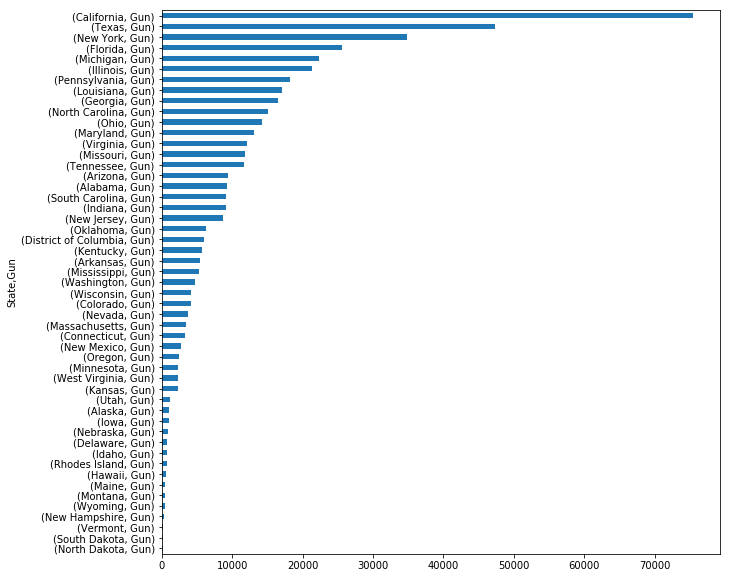

In [31]:
sum_weapons.groupby('State')['Gun'].value_counts().sort_values(ascending = True).plot(kind='barh', figsize=(10,10))

#plt.savefig("guns.pdf")

In [32]:
#standardize with population

In [33]:
df_pop = pd.read_csv("population.csv")
df_pop.head()

,State,2010,2011,2012,2013,2014,2015,2016
0,Alabama,"4,785,492","4,799,918","4,815,960","4,829,479","4,843,214","4,853,875","4,863,300"
1,Alaska,"714,031","722,713","731,089","736,879","736,705","737,709","741,894"
2,Arizona,"6,408,312","6,467,163","6,549,634","6,624,617","6,719,993","6,817,565","6,931,071"
3,Arkansas,"2,921,995","2,939,493","2,950,685","2,958,663","2,966,912","2,977,853","2,988,248"
4,California,"37,332,685","37,676,861","38,011,074","38,335,203","38,680,810","38,993,940","39,250,017"


In [34]:
df_pop.head()

,State,2010,2011,2012,2013,2014,2015,2016
0,Alabama,"4,785,492","4,799,918","4,815,960","4,829,479","4,843,214","4,853,875","4,863,300"
1,Alaska,"714,031","722,713","731,089","736,879","736,705","737,709","741,894"
2,Arizona,"6,408,312","6,467,163","6,549,634","6,624,617","6,719,993","6,817,565","6,931,071"
3,Arkansas,"2,921,995","2,939,493","2,950,685","2,958,663","2,966,912","2,977,853","2,988,248"
4,California,"37,332,685","37,676,861","38,011,074","38,335,203","38,680,810","38,993,940","39,250,017"


In [35]:
df_pop['2016'] = df_pop['2016'].str.replace(',', '').astype(int)

In [36]:
df_pop.drop(['2010', '2011', '2012', '2013', '2014', '2015'], axis=1, inplace=True)

In [51]:
df_pop.head()

,State,2016
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


In [38]:
df_laws = pd.read_csv('gun_laws.csv')
df_laws.head()

,Gun_law_rank,State,Grade,Gun death rate rank
0,1,California,A,43
1,2,Connecticut,A,46
2,3,New Jersey,A,45
3,4,Massachusetts,A,50
4,5,Maryland,A,27


In [39]:
combined_df = sum_weapons.merge(df_pop, left_on="State", right_on="State")
combined_df.head()

,ID,State,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,Gun,2016
0,197601001AKASP00,Alaska,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,55,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments,NaN,741894
1,197602001AKASP00,Alaska,FBI,Yes,1976,February,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,15,Male,White,Shotgun,Stepfather,Circumstances undetermined,Gun,741894
2,197603001AK00101,Alaska,FBI,Yes,1976,March,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,NaN,68,Male,Black,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,Gun,741894
3,197603001AK00113,Alaska,FBI,Yes,1976,March,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,46,Female,NaN,58,Male,NaN,"Personal weapons, includes beating",Wife,Brawl due to influence of alcohol,NaN,741894
4,197603001AKASP00,Alaska,FBI,Yes,1976,March,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,36,Male,White,54,Male,White,Rifle,Friend,Other arguments,Gun,741894


In [40]:
count_guns = count_guns.merge(df_pop, left_on="State", right_on="State")

In [41]:
combined_df = combined_df.merge(df_laws, left_on="State", right_on="State")
combined_df.head()

,ID,State,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,Gun,2016,Gun_law_rank,Grade,Gun death rate rank
0,197601001AKASP00,Alaska,FBI,Yes,1976,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,55,Female,American Indian or Alaskan Native,Knife or cutting instrument,Husband,Other arguments,NaN,741894,44,F,1
1,197602001AKASP00,Alaska,FBI,Yes,1976,February,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,15,Male,White,Shotgun,Stepfather,Circumstances undetermined,Gun,741894,44,F,1
2,197603001AK00101,Alaska,FBI,Yes,1976,March,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,NaN,68,Male,Black,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,Gun,741894,44,F,1
3,197603001AK00113,Alaska,FBI,Yes,1976,March,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,46,Female,NaN,58,Male,NaN,"Personal weapons, includes beating",Wife,Brawl due to influence of alcohol,NaN,741894,44,F,1
4,197603001AKASP00,Alaska,FBI,Yes,1976,March,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,36,Male,White,54,Male,White,Rifle,Friend,Other arguments,Gun,741894,44,F,1


In [42]:
count_guns = count_guns.merge(df_laws, left_on="State", right_on="State")
count_guns.head()

,State,count,2016,Gun_law_rank,Grade,Gun death rate rank
0,Alabama,9323,4863300,37,F,3
1,Alaska,1069,741894,44,F,1
2,Arizona,9351,6931071,47,F,18
3,Arkansas,5462,2988248,38,F,11
4,California,75456,39250017,1,A,43


In [43]:
#pop stand.
count_guns['per'] = count_guns['count']/count_guns['2016']
count_guns.head()

,State,count,2016,Gun_law_rank,Grade,Gun death rate rank,per
0,Alabama,9323,4863300,37,F,3,0.001917
1,Alaska,1069,741894,44,F,1,0.001441
2,Arizona,9351,6931071,47,F,18,0.001349
3,Arkansas,5462,2988248,38,F,11,0.001828
4,California,75456,39250017,1,A,43,0.001922


In [44]:
combined_df = combined_df.dropna()

In [45]:
count_guns = count_guns.dropna()

In [46]:
count_guns = count_guns.sort_values(ascending=False, by='per')

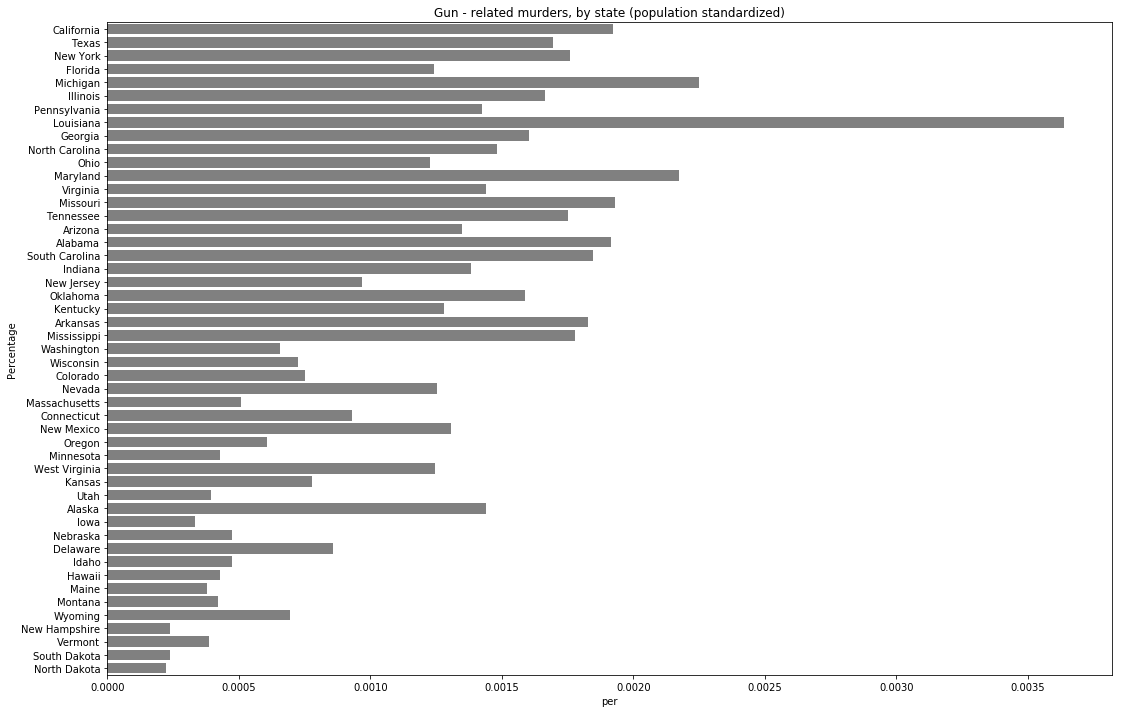

In [52]:
plt.figure(figsize=(18,12))
sns.barplot(y='State', x='per', data=count_guns, color='grey', orient='h')
plt.ylabel('Percentage')
plt.title('Gun - related murders, by state (population standardized)')



In [48]:
count_guns = count_guns.sort_values(ascending=False, by='count')

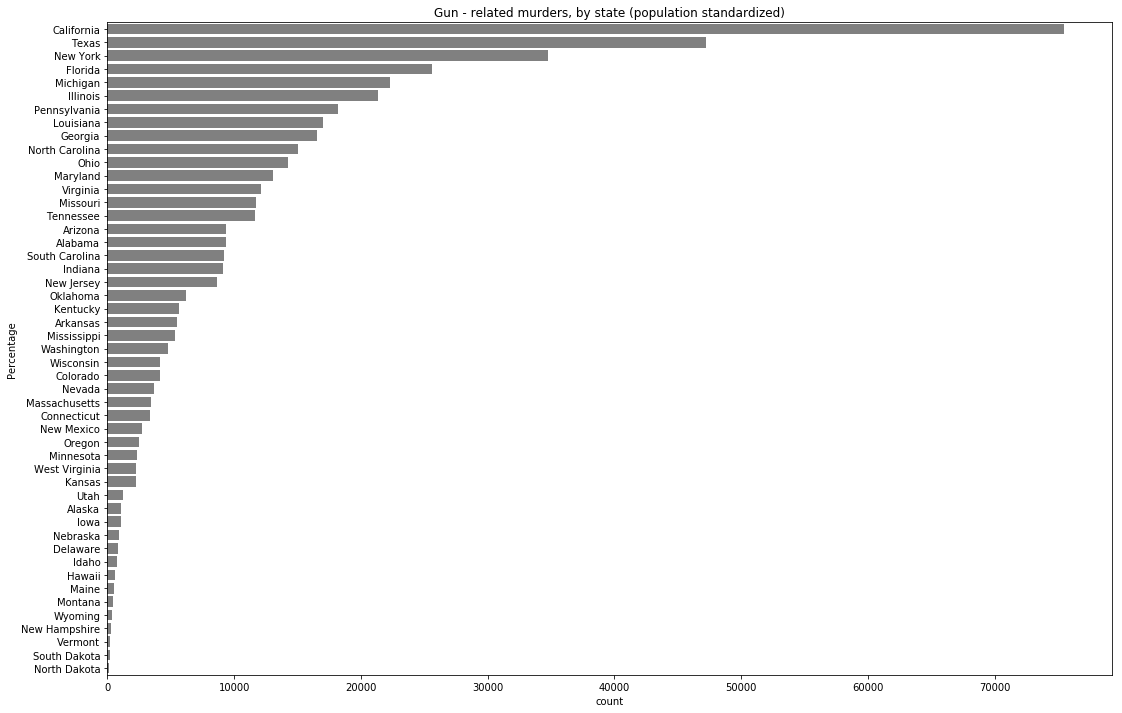

In [54]:
plt.figure(figsize=(18,12))
sns.barplot(y='State', x='count', data=count_guns, color='grey', orient='h')
plt.ylabel('Percentage')
plt.title('Gun - related murders, by state (population standardized)')

plt.savefig("murders_by_state.pdf")

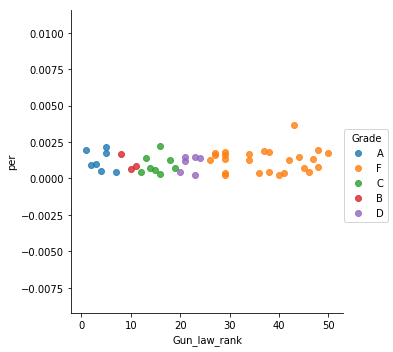

In [55]:
sns.lmplot(x="Gun_law_rank", y="per", hue="Grade", data=count_guns, fit_reg=False)

plt.savefig("scatter.pdf")